
# Exploration des Données

## Import des bibliothèques


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Import du dataset


In [2]:
df = pd.read_csv('dataset/housing_data_italy_august2022.csv')

## Informations & statistiques descriptives

In [3]:
print("\nInformation sur les données: ")
print(df.info())


Information sur les données: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223409 entries, 0 to 223408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    223409 non-null  int64  
 1   timestamp             223409 non-null  float64
 2   location              223409 non-null  object 
 3   title                 223409 non-null  object 
 4   price                 184293 non-null  float64
 5   n_rooms               163086 non-null  float64
 6   floor                 151044 non-null  float64
 7   mq                    219375 non-null  float64
 8   n_bathrooms           209012 non-null  float64
 9   year_of_construction  223399 non-null  float64
 10  availability          223409 non-null  object 
 11  energy_class          222730 non-null  object 
 12  status                223409 non-null  object 
 13  heating               223409 non-null  object 
 14  has_garage           

In [4]:
print("\nStatistiques descriptives: ")
print(df.describe())


Statistiques descriptives: 
                  id     timestamp         price        n_rooms  \
count  223409.000000  2.234090e+05  1.842930e+05  163086.000000   
mean   111705.000000  1.661136e+09  2.399390e+05       3.503372   
std     64492.767482  1.264542e+04  7.562062e+06       0.985630   
min         1.000000  1.661114e+09  1.000000e+00       2.000000   
25%     55853.000000  1.661125e+09  7.800000e+04       3.000000   
50%    111705.000000  1.661136e+09  1.350000e+05       3.000000   
75%    167557.000000  1.661146e+09  2.350000e+05       4.000000   
max    223409.000000  1.661159e+09  2.147484e+09       5.000000   

               floor             mq    n_bathrooms  year_of_construction  \
count  151044.000000  219375.000000  209012.000000         223399.000000   
mean        1.820847     158.632825       1.587540           1965.133241   
std         1.133222     128.681326       0.668034             76.746613   
min         1.000000       1.000000       1.000000           10

## Visualisation des prix


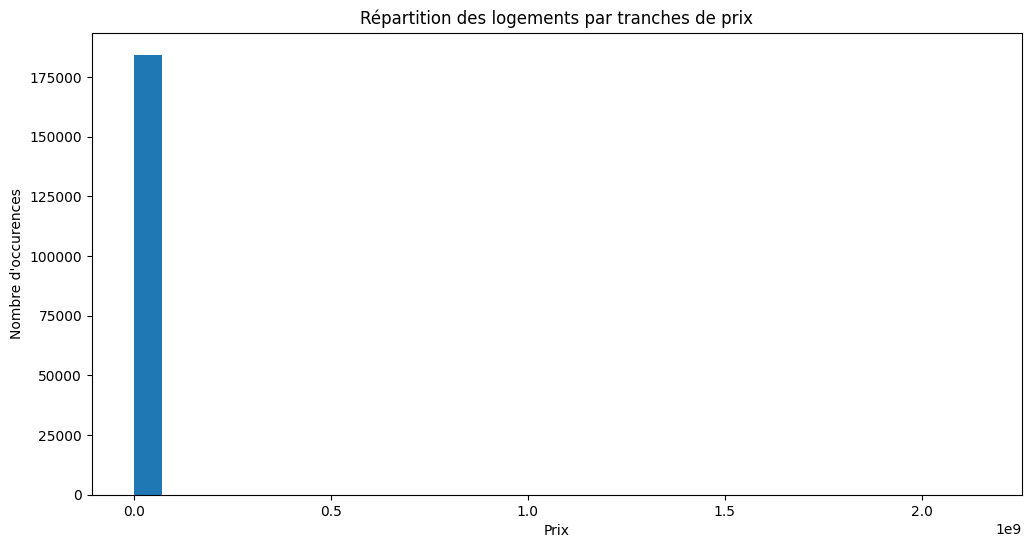

In [15]:
plt.figure(figsize = (12,6))
plt.hist(df['price'], bins = 30)
plt.xlabel('Prix')
plt.ylabel('Nombre d\'occurences')
plt.title('Répartition des logements par tranches de prix')
plt.savefig('output/price_distribution.png')
plt.show()
plt.close()

Un outlier à 2 milliards fausse la visualisation.
On va limiter les valeurs de 0 à 1 million d'euros et affiner les tranches.

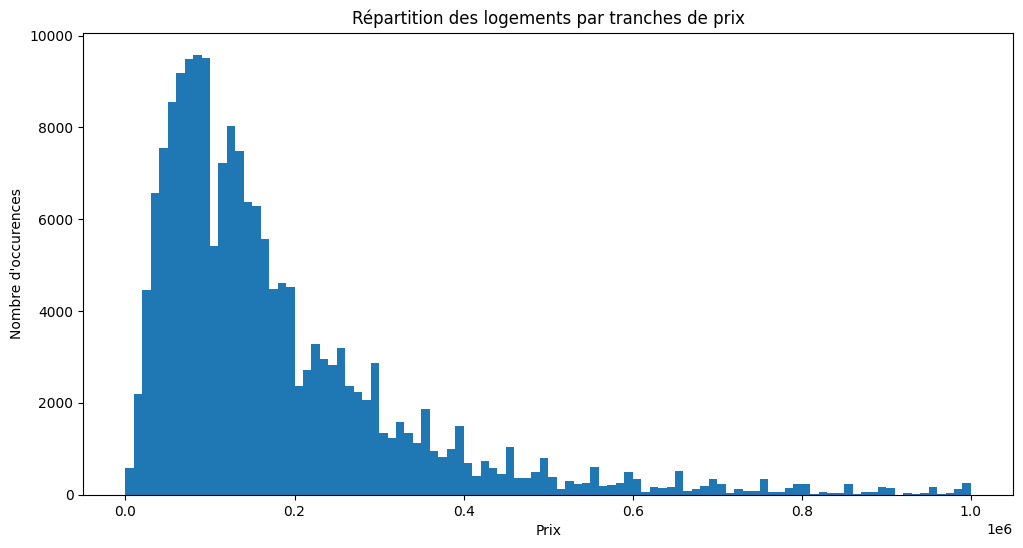

In [16]:
plt.figure(figsize = (12,6))
plt.hist(df['price'], bins = 100, range=(0, 1000000))
plt.xlabel('Prix')
plt.ylabel('Nombre d\'occurences')
plt.title('Répartition des logements par tranches de prix')
plt.savefig('output/price_distribution.png')
plt.show()
plt.close()

Ajout de la moyenne, la médiane et les quartiles.

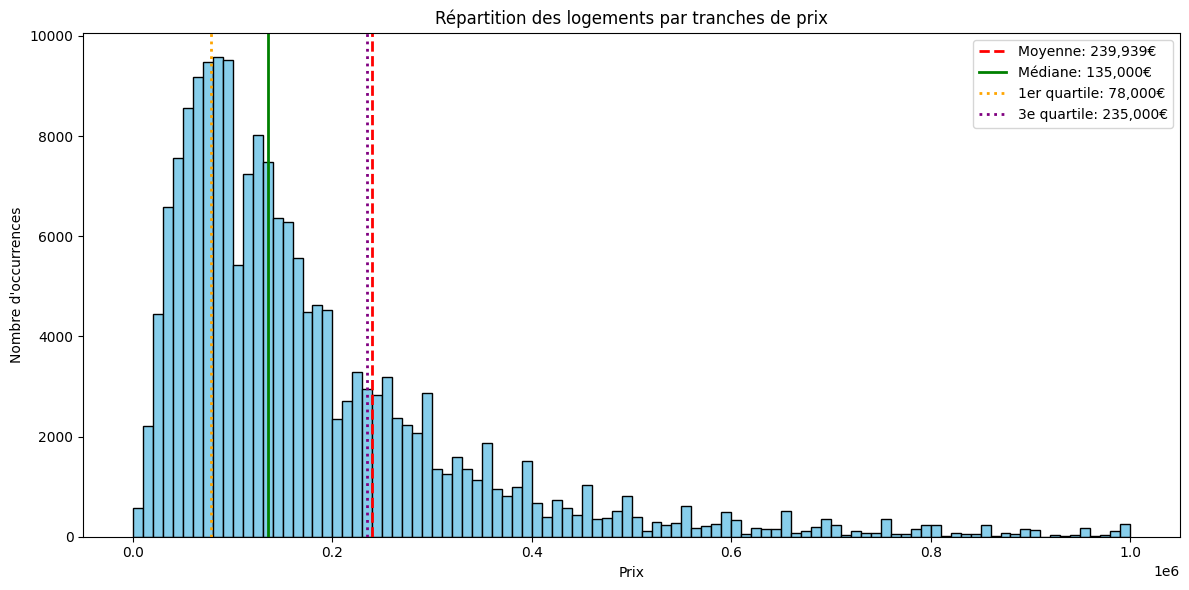

In [17]:
# Calcul des statistiques
mean_price = df['price'].mean()
median_price = df['price'].median()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# Affichage
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=100, range=(0, 1000000), color='skyblue', edgecolor='black')
plt.xlabel('Prix')
plt.ylabel("Nombre d'occurrences")
plt.title('Répartition des logements par tranches de prix')

# Ajout des lignes statistiques
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_price:,.0f}€')
plt.axvline(median_price, color='green', linestyle='-', linewidth=2, label=f'Médiane: {median_price:,.0f}€')
plt.axvline(q1, color='orange', linestyle=':', linewidth=2, label=f'1er quartile: {q1:,.0f}€')
plt.axvline(q3, color='purple', linestyle=':', linewidth=2, label=f'3e quartile: {q3:,.0f}€')

plt.legend()
plt.tight_layout()
plt.savefig('output/price_distribution.png')
plt.show()
plt.close()